In [1]:
import bauer
from bauer.utils.data import load_garcia2022
import seaborn as sns

In [2]:
df = load_garcia2022()

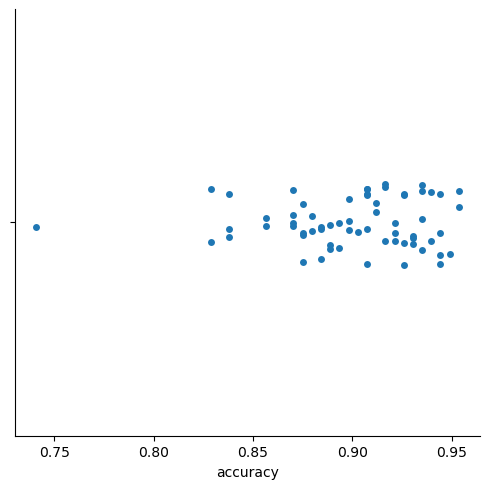

In [3]:
tmp = df[['accuracy']].groupby('subject').mean().reset_index()

sns.catplot(tmp, x='accuracy')

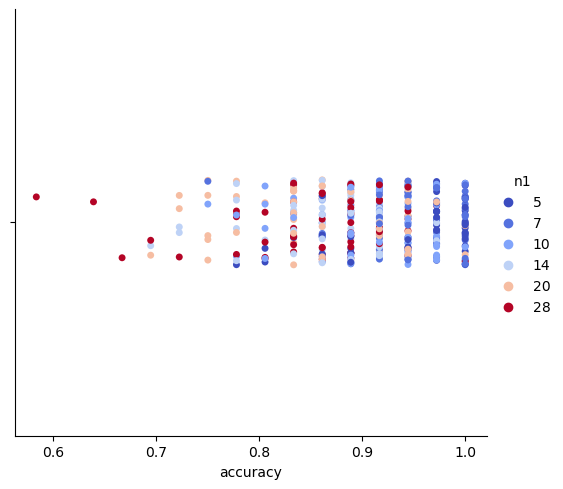

In [4]:
tmp = df[['accuracy', 'n1']].groupby(['subject', 'n1']).mean().reset_index()

sns.catplot(tmp, x='accuracy', hue='n1', palette='coolwarm')

In [5]:
df['frac_'] = df['n2'] / df['n1']
import pandas as pd
df['frac'] = pd.qcut(df['frac_'], 8).apply(lambda x: x.mid).astype(float).round(1)
# df['frac'] = df['frac_']

<AxesSubplot: xlabel='frac', ylabel='choice'>

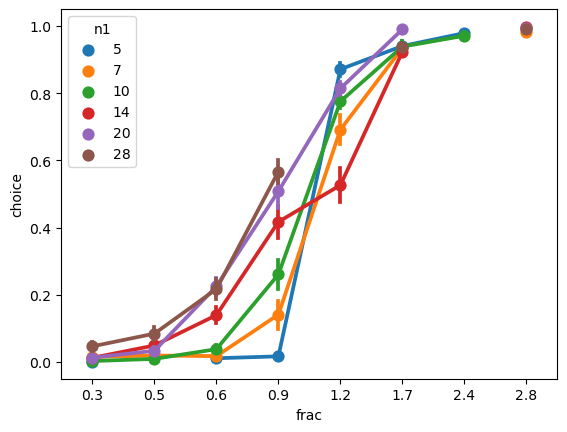

In [6]:
sns.pointplot(df.groupby(['subject', 'frac', 'n1']).mean().reset_index(), x='frac', hue='n1', y='choice', errorbar='se')

In [7]:
df.groupby(['n1', 'n2', 'frac']).size()

n1  n2  frac
5   2   0.3     358
    3   0.6     320
    4   0.9     480
    6   1.2     175
    7   1.2     303
    10  1.7     301
    14  2.4     367
7   2   0.3     341
    4   0.5     342
    5   0.6     333
    6   0.9     151
    8   1.2     154
    10  1.7     327
    14  1.7     336
    20  2.8     320
10  4   0.3     351
    5   0.5     323
    7   0.6     323
    9   0.9     155
    11  1.2     175
    14  1.2     341
    20  1.7     331
    28  2.4     305
14  5   0.3     306
    7   0.5     323
    10  0.6     335
    13  0.9     165
    15  1.2     162
    20  1.7     328
    28  1.7     338
    40  2.8     347
20  7   0.3     316
    10  0.5     329
    14  0.6     326
    19  0.9     166
    21  1.2     175
    28  1.2     346
    40  1.7     318
    57  2.8     328
28  10  0.3     320
    14  0.5     339
    20  0.6     298
    27  0.9     174
    29  0.9     163
    40  1.7     345
    56  1.7     361
    79  2.8     304
dtype: int64

In [8]:
df.groupby(['n1', 'n2', 'frac']).size().groupby('n1').size()

n1
5     7
7     8
10    8
14    8
20    8
28    8
dtype: int64